# Pronóstico de la evolución de pacientes con diabetes

## Descripción del problema real

Los tratamientos médicos están basados en las expectativas de recuperación o el avance de una enfermedad para tomar decisiones. En este caso, un equipo médico desea contar con pronósticos de pacientes con diabetes para tomar decisiones sobre su tratamiento.

## Descripción del problema en términos de los datos

Se desea determinar el progreso de la diabeteis un año hacia adelante a partir de las variables medidas para 442 pacientes. La información está almacenada en el archivo `datos/diabetes.csv`. Las variables medidas son: edad, sexo, indice de masa corporal, presión sanguinea y seis medidas de serum en la sangre. Se desea pronósticar el progreso de la enfermedad a partir de las variables dadas.

## Aproximaciones posibles

En este caso, se desea comparar los resultados de un modelo de regresión lineal y un modelo de redes neuronales artificiales.

## Requerimientos

Usted debe:

* Determinar cuáles de las variables consideradas son relevantes para el problema.


* Determinar si hay alguna transformación de las variables de entrada o de salida que mejore el pronóstico del modelo.


* Construir un modelo de regresión lineal que sirva como base para construir un modelo de redes neuronales artificiales.



* Construir un modelo de redes neuronales artificiales. Asimismo, debe determinar el número de neuronas en la capa o capas ocultas.


* Utiizar una técnica como crossvalidation u otra similar para establecer la robustez del modelo.

## Desarrollo

In [431]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import statsmodels.api as sm
%matplotlib inline

In [432]:
df = pd.read_csv("./datos/diabetes.csv",
    sep = ',',           
    thousands = None,    
    decimal = '.',       
    encoding='latin-1') 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
age    442 non-null float64
sex    442 non-null float64
bmi    442 non-null float64
bp     442 non-null float64
s1     442 non-null float64
s2     442 non-null float64
s3     442 non-null float64
s4     442 non-null float64
s5     442 non-null float64
s6     442 non-null float64
Y      442 non-null float64
dtypes: float64(11)
memory usage: 38.1 KB


In [433]:
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Y
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0


In [434]:
#Normalización de los datos
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_norm = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)
df_norm

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Y
0,0.666667,1.0,0.582645,0.549296,0.294118,0.256972,0.207792,0.282087,0.562217,0.439394,0.392523
1,0.483333,0.0,0.148760,0.352113,0.421569,0.306773,0.623377,0.141044,0.222443,0.166667,0.155763
2,0.883333,1.0,0.516529,0.436620,0.289216,0.258964,0.246753,0.282087,0.496584,0.409091,0.361371
3,0.083333,0.0,0.301653,0.309859,0.495098,0.447211,0.233766,0.423131,0.572936,0.469697,0.563863
4,0.516667,0.0,0.206612,0.549296,0.465686,0.417331,0.389610,0.282087,0.362369,0.333333,0.342679
...,...,...,...,...,...,...,...,...,...,...,...
437,0.683333,1.0,0.421488,0.704225,0.431373,0.359562,0.259740,0.282087,0.605670,0.530303,0.476636
438,0.466667,1.0,0.285124,0.183099,0.627451,0.619522,0.259740,0.423131,0.415790,0.666667,0.246106
439,0.683333,1.0,0.285124,0.530516,0.318627,0.323705,0.272727,0.249647,0.305040,0.560606,0.333333
440,0.283333,0.0,0.495868,0.464789,0.509804,0.416335,0.259740,0.393512,0.657020,0.409091,0.607477


## Modelo con todas las variables (10)

Vamos a comparar los resultados de la estimación del modelo con las 10 variables sin ninguna transformación y con las variables normalizadas para escoger cual ofrece mejores resultados.

In [435]:
#DATOS SIN TRANSFORMACIÓN
#Separamos el DataFrame en Variable Dependiente "y" y variables Independientes
y = df['Y'].tolist()
x10 = df.iloc[:,0:10]
x10.columns

Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'], dtype='object')

In [436]:
#Usamos OLS para estimar la significancia del modelo, con los datos sin escalar
model = sm.OLS(y, x10)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.106
Model:                            OLS   Adj. R-squared (uncentered):              0.085
Method:                 Least Squares   F-statistic:                              5.100
Date:                Mon, 06 Apr 2020   Prob (F-statistic):                    4.72e-07
Time:                        19:31:49   Log-Likelihood:                         -2873.9
No. Observations:                 442   AIC:                                      5768.
Df Residuals:                     432   BIC:                                      5809.
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [437]:
#Estimacipon del modelo con las VARIABLES NORMALIZADAS
y = df_norm['Y']
x10n = df_norm.iloc[:,0:10]
x10n.columns
model = sm.OLS(yn, x10n)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                      Y   R-squared (uncentered):                   0.870
Model:                            OLS   Adj. R-squared (uncentered):              0.867
Method:                 Least Squares   F-statistic:                              290.0
Date:                Mon, 06 Apr 2020   Prob (F-statistic):                   1.28e-184
Time:                        19:31:49   Log-Likelihood:                          164.60
No. Observations:                 442   AIC:                                     -309.2
Df Residuals:                     432   BIC:                                     -268.3
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

>Definitivamente es mejor trabajar con los datos normalizados, ya que como se aprecia en las estimaciones anteriores el **`Adj. R-squared` es bastante mayor** para el modelo con las variables normalizadas. 

A continuación se realiza el método backward para seleccionar las variables más representativas al modelo, como se sugiere en [este enlace](https://jdvelasq.github.io/courses/notebooks/sklearn/fundamentals/2-08-akaike.html).

## Modelos con 9 Variables

In [438]:
#Modelo sin X1 = Edad
y = df_norm['Y']
x9_age = df_norm.iloc[:,1:10]

In [439]:
model = sm.OLS(y, x9_age)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                      Y   R-squared (uncentered):                   0.870
Model:                            OLS   Adj. R-squared (uncentered):              0.868
Method:                 Least Squares   F-statistic:                              322.9
Date:                Mon, 06 Apr 2020   Prob (F-statistic):                   7.05e-186
Time:                        19:31:49   Log-Likelihood:                          164.58
No. Observations:                 442   AIC:                                     -311.2
Df Residuals:                     433   BIC:                                     -274.3
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [440]:
#Modelo sin X2 = Sexo
y = df_norm['Y']
x9_sex = df_norm.iloc[: ,[0,2,3,4,5,6,7,8,9]]
model = sm.OLS(y, x9_sex)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                      Y   R-squared (uncentered):                   0.866
Model:                            OLS   Adj. R-squared (uncentered):              0.863
Method:                 Least Squares   F-statistic:                              309.8
Date:                Mon, 06 Apr 2020   Prob (F-statistic):                   1.66e-182
Time:                        19:31:50   Log-Likelihood:                          156.63
No. Observations:                 442   AIC:                                     -295.3
Df Residuals:                     433   BIC:                                     -258.4
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [441]:
#Modelo sin X3 = Indice de masa corporal
y = df_norm['Y']
x9_bmi = df_norm.iloc[: ,[0,1,3,4,5,6,7,8,9]]
model = sm.OLS(y, x9_bmi)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                      Y   R-squared (uncentered):                   0.852
Model:                            OLS   Adj. R-squared (uncentered):              0.849
Method:                 Least Squares   F-statistic:                              277.3
Date:                Mon, 06 Apr 2020   Prob (F-statistic):                   1.44e-173
Time:                        19:31:50   Log-Likelihood:                          135.57
No. Observations:                 442   AIC:                                     -253.1
Df Residuals:                     433   BIC:                                     -216.3
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [442]:
#Modelo sin X4 = presionsanguinea
y = df_norm['Y']
x9_bp = df_norm.iloc[: ,[0,1,2,4,5,6,7,8,9]]
model = sm.OLS(y, x9_bp)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                      Y   R-squared (uncentered):                   0.863
Model:                            OLS   Adj. R-squared (uncentered):              0.860
Method:                 Least Squares   F-statistic:                              303.3
Date:                Mon, 06 Apr 2020   Prob (F-statistic):                   8.56e-181
Time:                        19:31:50   Log-Likelihood:                          152.60
No. Observations:                 442   AIC:                                     -287.2
Df Residuals:                     433   BIC:                                     -250.4
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [443]:
#Modelo sin X5 = S1
y = df_norm['Y']
x9_s1 = df_norm.iloc[: ,[0,1,2,3,5,6,7,8,9]]
model = sm.OLS(y, x9_s1)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                      Y   R-squared (uncentered):                   0.869
Model:                            OLS   Adj. R-squared (uncentered):              0.866
Method:                 Least Squares   F-statistic:                              318.6
Date:                Mon, 06 Apr 2020   Prob (F-statistic):                   8.50e-185
Time:                        19:31:50   Log-Likelihood:                          162.03
No. Observations:                 442   AIC:                                     -306.1
Df Residuals:                     433   BIC:                                     -269.2
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [444]:
#Modelo sin X6 = S2
y = df_norm['Y']
x9_s2 = df_norm.iloc[: ,[0,1,2,3,4,6,7,8,9]]
model = sm.OLS(y, x9_s2)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                      Y   R-squared (uncentered):                   0.870
Model:                            OLS   Adj. R-squared (uncentered):              0.867
Method:                 Least Squares   F-statistic:                              321.7
Date:                Mon, 06 Apr 2020   Prob (F-statistic):                   1.40e-185
Time:                        19:31:50   Log-Likelihood:                          163.88
No. Observations:                 442   AIC:                                     -309.8
Df Residuals:                     433   BIC:                                     -272.9
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [445]:
#Modelo sin X7 = S3
y = df_norm['Y']
x9_s3 = df_norm.iloc[: ,[0,1,2,3,4,5,7,8,9]]
model = sm.OLS(y, x9_s3)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                      Y   R-squared (uncentered):                   0.870
Model:                            OLS   Adj. R-squared (uncentered):              0.867
Method:                 Least Squares   F-statistic:                              322.2
Date:                Mon, 06 Apr 2020   Prob (F-statistic):                   1.07e-185
Time:                        19:31:50   Log-Likelihood:                          164.15
No. Observations:                 442   AIC:                                     -310.3
Df Residuals:                     433   BIC:                                     -273.5
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [446]:
#Modelo sin X8 = S4
y = df_norm['Y']
x9_s4 = df_norm.iloc[: ,[0,1,2,3,4,5,6,8,9]]
model = sm.OLS(y, x9_s4)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                      Y   R-squared (uncentered):                   0.870
Model:                            OLS   Adj. R-squared (uncentered):              0.867
Method:                 Least Squares   F-statistic:                              322.4
Date:                Mon, 06 Apr 2020   Prob (F-statistic):                   9.27e-186
Time:                        19:31:50   Log-Likelihood:                          164.30
No. Observations:                 442   AIC:                                     -310.6
Df Residuals:                     433   BIC:                                     -273.8
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [447]:
#Modelo sin X9 = S5
y = df_norm['Y']
x9_s5 = df_norm.iloc[: ,[0,1,2,3,4,5,6,7,9]]
model = sm.OLS(y, x9_s5)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                      Y   R-squared (uncentered):                   0.860
Model:                            OLS   Adj. R-squared (uncentered):              0.857
Method:                 Least Squares   F-statistic:                              296.2
Date:                Mon, 06 Apr 2020   Prob (F-statistic):                   7.00e-179
Time:                        19:31:50   Log-Likelihood:                          148.09
No. Observations:                 442   AIC:                                     -278.2
Df Residuals:                     433   BIC:                                     -241.4
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [448]:
#Modelo sin X10 = S6
y = df_norm['Y']
x9_s6 = df_norm.iloc[: ,[0,1,2,3,4,5,6,7,8]]
model = sm.OLS(y, x9_s6)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                      Y   R-squared (uncentered):                   0.870
Model:                            OLS   Adj. R-squared (uncentered):              0.867
Method:                 Least Squares   F-statistic:                              322.1
Date:                Mon, 06 Apr 2020   Prob (F-statistic):                   1.09e-185
Time:                        19:31:50   Log-Likelihood:                          164.13
No. Observations:                 442   AIC:                                     -310.3
Df Residuals:                     433   BIC:                                     -273.4
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

La candidata a salir es la variable Edad ya que en su ausencia el modelo con 9 variables obtuvo el `Adj. R-squared` mayor al modelo con 10 variables. **`Dicho modelo también obtuvo el mejor puntaje Akika`**, esto quiere decir que el modelo mejora en ausencia de esta variable. También, en el modelo con 10 variables, la variable Edad fue la menos significativa en presencia de las demás. Por consiguiente **la variable EDAD sale del modelo.**

##  Modelo final con 9 variables

In [449]:
x9 = df_norm.iloc[: ,[1,2,3,4,5,6,7,8,9]]
x9.columns

Index(['sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'], dtype='object')

## Modelos con 8 variables

In [450]:
#Modelo sin la variable X1 = Sexo
y = df_norm['Y']
x8_sex = df_norm.iloc[: ,[2,3,4,5,6,7,8,9]]
model = sm.OLS(y, x8_sex)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                      Y   R-squared (uncentered):                   0.865
Model:                            OLS   Adj. R-squared (uncentered):              0.863
Method:                 Least Squares   F-statistic:                              349.0
Date:                Mon, 06 Apr 2020   Prob (F-statistic):                   1.03e-183
Time:                        19:31:51   Log-Likelihood:                          156.46
No. Observations:                 442   AIC:                                     -296.9
Df Residuals:                     434   BIC:                                     -264.2
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [451]:
# Modelo sin la variable X2 = indice de masa corporal
y = df_norm['Y']
x8_bmi = df_norm.iloc[: ,[1,3,4,5,6,7,8,9]]
model = sm.OLS(y, x8_bmi)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                      Y   R-squared (uncentered):                   0.852
Model:                            OLS   Adj. R-squared (uncentered):              0.849
Method:                 Least Squares   F-statistic:                              312.6
Date:                Mon, 06 Apr 2020   Prob (F-statistic):                   8.07e-175
Time:                        19:31:51   Log-Likelihood:                          135.55
No. Observations:                 442   AIC:                                     -255.1
Df Residuals:                     434   BIC:                                     -222.4
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [452]:
# Modelo sin la variable X3 = Presión Sanguínea
y = df_norm['Y']
x8_bp = df_norm.iloc[: ,[1,2,4,5,6,7,8,9]]
model = sm.OLS(y, x8_bp)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                      Y   R-squared (uncentered):                   0.863
Model:                            OLS   Adj. R-squared (uncentered):              0.860
Method:                 Least Squares   F-statistic:                              341.5
Date:                Mon, 06 Apr 2020   Prob (F-statistic):                   5.93e-182
Time:                        19:31:51   Log-Likelihood:                          152.32
No. Observations:                 442   AIC:                                     -288.6
Df Residuals:                     434   BIC:                                     -255.9
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [453]:
# Modelo sin la variable X4 = S1
y = df_norm['Y']
x8_s1 = df_norm.iloc[: ,[1,2,3,5,6,7,8,9]]
model = sm.OLS(y, x8_s1)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                      Y   R-squared (uncentered):                   0.869
Model:                            OLS   Adj. R-squared (uncentered):              0.866
Method:                 Least Squares   F-statistic:                              359.3
Date:                Mon, 06 Apr 2020   Prob (F-statistic):                   4.34e-186
Time:                        19:31:51   Log-Likelihood:                          162.03
No. Observations:                 442   AIC:                                     -308.1
Df Residuals:                     434   BIC:                                     -275.3
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [454]:
# Modelo sin la variable X5 = S2
y = df_norm['Y']
x8_s2 = df_norm.iloc[: ,[1,2,3,4,6,7,8,9]]
model = sm.OLS(y, x8_s2)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                      Y   R-squared (uncentered):                   0.870
Model:                            OLS   Adj. R-squared (uncentered):              0.868
Method:                 Least Squares   F-statistic:                              362.8
Date:                Mon, 06 Apr 2020   Prob (F-statistic):                   7.11e-187
Time:                        19:31:51   Log-Likelihood:                          163.88
No. Observations:                 442   AIC:                                     -311.8
Df Residuals:                     434   BIC:                                     -279.0
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [455]:
# Modelo sin la variable X6 = S3
y = df_norm['Y']
x8_s3 = df_norm.iloc[: ,[1,2,3,4,5,7,8,9]]
model = sm.OLS(y, x8_s3)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                      Y   R-squared (uncentered):                   0.870
Model:                            OLS   Adj. R-squared (uncentered):              0.868
Method:                 Least Squares   F-statistic:                              363.2
Date:                Mon, 06 Apr 2020   Prob (F-statistic):                   5.85e-187
Time:                        19:31:51   Log-Likelihood:                          164.08
No. Observations:                 442   AIC:                                     -312.2
Df Residuals:                     434   BIC:                                     -279.4
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [456]:
# Modelo sin la variable X7 = S4
y = df_norm['Y']
x8_s4 = df_norm.iloc[: ,[1,2,3,4,5,6,8,9]]
model = sm.OLS(y, x8_s4)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                      Y   R-squared (uncentered):                   0.870
Model:                            OLS   Adj. R-squared (uncentered):              0.868
Method:                 Least Squares   F-statistic:                              363.5
Date:                Mon, 06 Apr 2020   Prob (F-statistic):                   4.80e-187
Time:                        19:31:51   Log-Likelihood:                          164.28
No. Observations:                 442   AIC:                                     -312.6
Df Residuals:                     434   BIC:                                     -279.8
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [457]:
# Modelo sin la variable X8 = S5
y = df_norm['Y']
x8_s5 = df_norm.iloc[: ,[1,2,3,4,5,6,7,9]]
model = sm.OLS(y, x8_s5)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                      Y   R-squared (uncentered):                   0.860
Model:                            OLS   Adj. R-squared (uncentered):              0.858
Method:                 Least Squares   F-statistic:                              333.7
Date:                Mon, 06 Apr 2020   Prob (F-statistic):                   4.34e-180
Time:                        19:31:51   Log-Likelihood:                          147.94
No. Observations:                 442   AIC:                                     -279.9
Df Residuals:                     434   BIC:                                     -247.1
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [458]:
# Modelo sin la variable X9 = S6
y = df_norm['Y']
x8_s6 = df_norm.iloc[: ,[1,2,3,4,5,6,7,8]]
model = sm.OLS(y, x8_s6)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                      Y   R-squared (uncentered):                   0.870
Model:                            OLS   Adj. R-squared (uncentered):              0.868
Method:                 Least Squares   F-statistic:                              363.2
Date:                Mon, 06 Apr 2020   Prob (F-statistic):                   5.56e-187
Time:                        19:31:51   Log-Likelihood:                          164.13
No. Observations:                 442   AIC:                                     -312.3
Df Residuals:                     434   BIC:                                     -279.5
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

Las candidatas a salir son S3, S4 y S6 ya que el **`Adj. R-squared` para cada modelo sin las candidatas a salir es de 0.868** igual que el modelo con 9 variables pero con un **`puntaje AKIKE menor a -312`**, que es menor que el modelo anterior. Pero en el modelo con 9 variables vemos que la variable menos significativa en presencia de las demás es S4. Por tanto **`S4 sale del modelo`**

## Modelo final con 8 variables

In [459]:
x8 = df_norm.iloc[: ,[1,2,3,4,5,6,8,9]]
x8.columns

Index(['sex', 'bmi', 'bp', 's1', 's2', 's3', 's5', 's6'], dtype='object')

### Modelos con 7 variables

In [460]:
# Modelo sin la variable X1 = Sexo
y = df_norm['Y']
x7_sex = df_norm.iloc[: ,[2,3,4,5,6,8,9]]
model = sm.OLS(y, x7_sex)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                      Y   R-squared (uncentered):                   0.865
Model:                            OLS   Adj. R-squared (uncentered):              0.863
Method:                 Least Squares   F-statistic:                              399.7
Date:                Mon, 06 Apr 2020   Prob (F-statistic):                   5.08e-185
Time:                        19:31:52   Log-Likelihood:                          156.43
No. Observations:                 442   AIC:                                     -298.9
Df Residuals:                     435   BIC:                                     -270.2
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [461]:
# Modelo sin la variable X2 = Índice de Masa Corporal
y = df_norm['Y']
x7_bmi = df_norm.iloc[: ,[1,3,4,5,6,8,9]]
model = sm.OLS(y, x7_bmi)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                      Y   R-squared (uncentered):                   0.852
Model:                            OLS   Adj. R-squared (uncentered):              0.850
Method:                 Least Squares   F-statistic:                              357.6
Date:                Mon, 06 Apr 2020   Prob (F-statistic):                   5.23e-176
Time:                        19:31:52   Log-Likelihood:                          135.30
No. Observations:                 442   AIC:                                     -256.6
Df Residuals:                     435   BIC:                                     -228.0
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [462]:
# Modelo sin la variable X3 = Presión Sanguínea
y = df_norm['Y']
x7_bp = df_norm.iloc[: ,[1,2,4,5,6,8,9]]
model = sm.OLS(y, x7_bp)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                      Y   R-squared (uncentered):                   0.863
Model:                            OLS   Adj. R-squared (uncentered):              0.861
Method:                 Least Squares   F-statistic:                              391.0
Date:                Mon, 06 Apr 2020   Prob (F-statistic):                   3.18e-183
Time:                        19:31:52   Log-Likelihood:                          152.22
No. Observations:                 442   AIC:                                     -290.4
Df Residuals:                     435   BIC:                                     -261.8
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [463]:
# Modelo sin la variable X4 = S1
y = df_norm['Y']
x7_s1 = df_norm.iloc[: ,[1,2,3,5,6,8,9]]
model = sm.OLS(y, x7_s1)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                      Y   R-squared (uncentered):                   0.868
Model:                            OLS   Adj. R-squared (uncentered):              0.866
Method:                 Least Squares   F-statistic:                              410.0
Date:                Mon, 06 Apr 2020   Prob (F-statistic):                   4.26e-187
Time:                        19:31:52   Log-Likelihood:                          161.30
No. Observations:                 442   AIC:                                     -308.6
Df Residuals:                     435   BIC:                                     -280.0
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [464]:
# Modelo sin la variable X5 = S2
y = df_norm['Y']
x7_s2 = df_norm.iloc[: ,[1,2,3,4,6,8,9]]
model = sm.OLS(y, x7_s2)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                      Y   R-squared (uncentered):                   0.869
Model:                            OLS   Adj. R-squared (uncentered):              0.867
Method:                 Least Squares   F-statistic:                              412.8
Date:                Mon, 06 Apr 2020   Prob (F-statistic):                   1.18e-187
Time:                        19:31:52   Log-Likelihood:                          162.61
No. Observations:                 442   AIC:                                     -311.2
Df Residuals:                     435   BIC:                                     -282.6
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [465]:
# Modelo sin la variable X6 = S3
y = df_norm['Y']
x7_s3 = df_norm.iloc[: ,[1,2,3,4,5,8,9]]
model = sm.OLS(y, x7_s3)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                      Y   R-squared (uncentered):                   0.869
Model:                            OLS   Adj. R-squared (uncentered):              0.867
Method:                 Least Squares   F-statistic:                              412.4
Date:                Mon, 06 Apr 2020   Prob (F-statistic):                   1.39e-187
Time:                        19:31:52   Log-Likelihood:                          162.44
No. Observations:                 442   AIC:                                     -310.9
Df Residuals:                     435   BIC:                                     -282.2
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [466]:
# Modelo sin la variable X7 = S5
y = df_norm['Y']
x7_s5 = df_norm.iloc[: ,[1,2,3,4,5,6,9]]
model = sm.OLS(y, x7_s5)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                      Y   R-squared (uncentered):                   0.854
Model:                            OLS   Adj. R-squared (uncentered):              0.851
Method:                 Least Squares   F-statistic:                              362.9
Date:                Mon, 06 Apr 2020   Prob (F-statistic):                   3.42e-177
Time:                        19:31:52   Log-Likelihood:                          138.08
No. Observations:                 442   AIC:                                     -262.2
Df Residuals:                     435   BIC:                                     -233.5
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [467]:
# Modelo sin la variable X8 = S6
y = df_norm['Y']
x7_s6 = df_norm.iloc[: ,[1,2,3,4,5,6,8]]
model = sm.OLS(y, x7_s6)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                      Y   R-squared (uncentered):                   0.870
Model:                            OLS   Adj. R-squared (uncentered):              0.868
Method:                 Least Squares   F-statistic:                              415.2
Date:                Mon, 06 Apr 2020   Prob (F-statistic):                   3.94e-188
Time:                        19:31:52   Log-Likelihood:                          163.72
No. Observations:                 442   AIC:                                     -313.4
Df Residuals:                     435   BIC:                                     -284.8
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

La candidadata a salir es S6 ya que el **`Adj. R-squared es 0.868.`**, que es igual al del modelo con 8 variables, pero `el puntaje Akike es menor (-313.4)` y en el modelo de 8 variables S6 era la menos signiicativa en presencia de las demás. También debido a que en el modelo sin la varible **`S6`** todas las variables cobran una gran significancia menos una, entonces **`S6 sale del modelo.`**

## Modelo final con 7 variables

In [468]:
x7 = df_norm.iloc[: ,[1,2,3,4,5,6,8]]
x7.columns

Index(['sex', 'bmi', 'bp', 's1', 's2', 's3', 's5'], dtype='object')

### Modelos con 6 variables

In [469]:
#Modelo sin la variable X1 = Sexo
y = df_norm['Y']
x6_sex = df_norm.iloc[: ,[2,3,4,5,6,8]]
model = sm.OLS(y, x6_sex)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                      Y   R-squared (uncentered):                   0.865
Model:                            OLS   Adj. R-squared (uncentered):              0.863
Method:                 Least Squares   F-statistic:                              467.0
Date:                Mon, 06 Apr 2020   Prob (F-statistic):                   2.70e-186
Time:                        19:31:53   Log-Likelihood:                          156.25
No. Observations:                 442   AIC:                                     -300.5
Df Residuals:                     436   BIC:                                     -275.9
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [470]:
#Modelo sin la variable X2 = Índice de Masa Corporal
y = df_norm['Y']
x6_bmi = df_norm.iloc[: ,[1,3,4,5,6,8]]
model = sm.OLS(y, x6_bmi)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                      Y   R-squared (uncentered):                   0.850
Model:                            OLS   Adj. R-squared (uncentered):              0.848
Method:                 Least Squares   F-statistic:                              413.0
Date:                Mon, 06 Apr 2020   Prob (F-statistic):                   2.48e-176
Time:                        19:31:53   Log-Likelihood:                          132.95
No. Observations:                 442   AIC:                                     -253.9
Df Residuals:                     436   BIC:                                     -229.4
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [471]:
#Modelo sin la variable X3 = Presión Sanguínea
y = df_norm['Y']
x6_bp = df_norm.iloc[: ,[1,2,4,5,6,8]]
model = sm.OLS(y, x6_bp)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                      Y   R-squared (uncentered):                   0.862
Model:                            OLS   Adj. R-squared (uncentered):              0.860
Method:                 Least Squares   F-statistic:                              452.5
Date:                Mon, 06 Apr 2020   Prob (F-statistic):                   9.91e-184
Time:                        19:31:53   Log-Likelihood:                          150.25
No. Observations:                 442   AIC:                                     -288.5
Df Residuals:                     436   BIC:                                     -264.0
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [472]:
#Modelo sin la variable X4 = S1
y = df_norm['Y']
x6_s1 = df_norm.iloc[: ,[1,2,3,5,6,8]]
model = sm.OLS(y, x6_s1)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                      Y   R-squared (uncentered):                   0.868
Model:                            OLS   Adj. R-squared (uncentered):              0.866
Method:                 Least Squares   F-statistic:                              476.3
Date:                Mon, 06 Apr 2020   Prob (F-statistic):                   6.44e-188
Time:                        19:31:53   Log-Likelihood:                          160.04
No. Observations:                 442   AIC:                                     -308.1
Df Residuals:                     436   BIC:                                     -283.5
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [473]:
#Modelo sin la variable X5 = S2
y = df_norm['Y']
x6_s2 = df_norm.iloc[: ,[1,2,3,4,6,8]]
model = sm.OLS(y, x6_s2)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                      Y   R-squared (uncentered):                   0.868
Model:                            OLS   Adj. R-squared (uncentered):              0.867
Method:                 Least Squares   F-statistic:                              479.6
Date:                Mon, 06 Apr 2020   Prob (F-statistic):                   1.76e-188
Time:                        19:31:53   Log-Likelihood:                          161.36
No. Observations:                 442   AIC:                                     -310.7
Df Residuals:                     436   BIC:                                     -286.2
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [474]:
#Modelo sin la variable X6 = S3
y = df_norm['Y']
x6_s3 = df_norm.iloc[: ,[1,2,3,4,5,8]]
model = sm.OLS(y, x6_s3)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                      Y   R-squared (uncentered):                   0.869
Model:                            OLS   Adj. R-squared (uncentered):              0.867
Method:                 Least Squares   F-statistic:                              482.0
Date:                Mon, 06 Apr 2020   Prob (F-statistic):                   6.77e-189
Time:                        19:31:53   Log-Likelihood:                          162.33
No. Observations:                 442   AIC:                                     -312.7
Df Residuals:                     436   BIC:                                     -288.1
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [475]:
#Modelo sin la variable X7 = S5
y = df_norm['Y']
x6_s5 = df_norm.iloc[: ,[1,2,3,4,5,6]]
model = sm.OLS(y, x6_s5)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                      Y   R-squared (uncentered):                   0.848
Model:                            OLS   Adj. R-squared (uncentered):              0.846
Method:                 Least Squares   F-statistic:                              405.7
Date:                Mon, 06 Apr 2020   Prob (F-statistic):                   6.55e-175
Time:                        19:31:53   Log-Likelihood:                          129.63
No. Observations:                 442   AIC:                                     -247.3
Df Residuals:                     436   BIC:                                     -222.7
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

La Variable **`S3 sale del modelo`** ya que en su ausencia, aunque el **`Adj. R-squared pasó de 0.868 a0.867`** (cambio qu es mínimo y que no modifica el porcentaje da la predicción que es axplicado por las variables independientes resultantes), en el modelo con 7 variables es la menos significativa en presencia de las demás variables. También es de notar que todas las variables cobra gran significancia con este modelo resultante al sacar S3 (viendo el valor p).

## Modelo final con 6 Variales

In [476]:
y = df_norm['Y']
x6 = df_norm.iloc[: ,[1,2,3,4,5,8]]
x6.columns

Index(['sex', 'bmi', 'bp', 's1', 's2', 's5'], dtype='object')

### Modelos con 5 variables

In [477]:
#Modelo sin la variable X1 = Sexo
y = df_norm['Y']
x5_sex = df_norm.iloc[: ,[2,3,4,5,8]]
model = sm.OLS(y, x5_sex)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                      Y   R-squared (uncentered):                   0.865
Model:                            OLS   Adj. R-squared (uncentered):              0.863
Method:                 Least Squares   F-statistic:                              557.6
Date:                Mon, 06 Apr 2020   Prob (F-statistic):                   4.20e-187
Time:                        19:31:53   Log-Likelihood:                          154.87
No. Observations:                 442   AIC:                                     -299.7
Df Residuals:                     437   BIC:                                     -279.3
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [478]:
#Modelo sin la variable X2 = Índice de Masa Corporal
y = df_norm['Y']
x5_bmi = df_norm.iloc[: ,[1,3,4,5,8]]
model = sm.OLS(y, x5_bmi)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                      Y   R-squared (uncentered):                   0.850
Model:                            OLS   Adj. R-squared (uncentered):              0.848
Method:                 Least Squares   F-statistic:                              495.1
Date:                Mon, 06 Apr 2020   Prob (F-statistic):                   1.91e-177
Time:                        19:31:54   Log-Likelihood:                          132.36
No. Observations:                 442   AIC:                                     -254.7
Df Residuals:                     437   BIC:                                     -234.3
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [479]:
#Modelo sin la variable X3 = Presión Sanguínea
y = df_norm['Y']
x5_bp = df_norm.iloc[: ,[1,2,4,5,8]]
model = sm.OLS(y, x5_bp)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                      Y   R-squared (uncentered):                   0.862
Model:                            OLS   Adj. R-squared (uncentered):              0.860
Method:                 Least Squares   F-statistic:                              544.3
Date:                Mon, 06 Apr 2020   Prob (F-statistic):                   4.04e-185
Time:                        19:31:54   Log-Likelihood:                          150.25
No. Observations:                 442   AIC:                                     -290.5
Df Residuals:                     437   BIC:                                     -270.0
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [480]:
#Modelo sin la variable X4 = S1
y = df_norm['Y']
x5_s1 = df_norm.iloc[: ,[1,2,3,5,8]]
model = sm.OLS(y, x5_s1)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                      Y   R-squared (uncentered):                   0.862
Model:                            OLS   Adj. R-squared (uncentered):              0.861
Method:                 Least Squares   F-statistic:                              546.3
Date:                Mon, 06 Apr 2020   Prob (F-statistic):                   2.01e-185
Time:                        19:31:54   Log-Likelihood:                          150.96
No. Observations:                 442   AIC:                                     -291.9
Df Residuals:                     437   BIC:                                     -271.5
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [481]:
#Modelo sin la variable X5 = S2
y = df_norm['Y']
x5_s2 = df_norm.iloc[: ,[1,2,3,4,8]]
model = sm.OLS(y, x5_s2)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                      Y   R-squared (uncentered):                   0.865
Model:                            OLS   Adj. R-squared (uncentered):              0.864
Method:                 Least Squares   F-statistic:                              561.6
Date:                Mon, 06 Apr 2020   Prob (F-statistic):                   1.08e-187
Time:                        19:31:54   Log-Likelihood:                          156.25
No. Observations:                 442   AIC:                                     -302.5
Df Residuals:                     437   BIC:                                     -282.0
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [482]:
#Modelo sin la variable X6 = S5
y = df_norm['Y']
x5_s5 = df_norm.iloc[: ,[1,2,3,4,5]]
model = sm.OLS(y, x5_s5)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                      Y   R-squared (uncentered):                   0.839
Model:                            OLS   Adj. R-squared (uncentered):              0.838
Method:                 Least Squares   F-statistic:                              456.9
Date:                Mon, 06 Apr 2020   Prob (F-statistic):                   5.11e-171
Time:                        19:31:54   Log-Likelihood:                          117.37
No. Observations:                 442   AIC:                                     -224.7
Df Residuals:                     437   BIC:                                     -204.3
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

>No hay mejoras eliminando otra variable, y en el modelo con 6 variables no habían variables con poca significancia con respecto a las demás. Por lo tanto se conserva el modelo con 6 variables.

### Modelos de regresión Lineal
Entrenaremos y evaluaremos los modelos de regresión con 6 variables y 10 variables para ver si en realidad es mejor el modelo de 6 variables.

In [483]:
#Train  and Test 
msk = np.random.rand(len(df_norm)) < 0.80
train = df_norm[msk]
test = df_norm[~msk]
print(len(train))
print(len(test))

340
102


In [484]:
#Evaluando modelo de 6 variables encontrado
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['sex', 'bmi', 'bp', 's1', 's2', 's5']])
y = np.asanyarray(train[['Y']])
regr.fit (x, y)
# The coefficients
print ('Coefficients: ', regr.coef_)

Coefficients:  [[-0.06901601  0.40580668  0.22206728 -0.70936812  0.62184477  0.67573762]]


In [485]:
y_hat= regr.predict(test[['sex', 'bmi', 'bp', 's1', 's2', 's5']])
x = np.asanyarray(test[['sex', 'bmi', 'bp', 's1', 's2', 's5']])
y = np.asanyarray(test[['Y']])
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))

Residual sum of squares: 0.02
Variance score: 0.61


Text(0, 0.5, 'Predicciones')

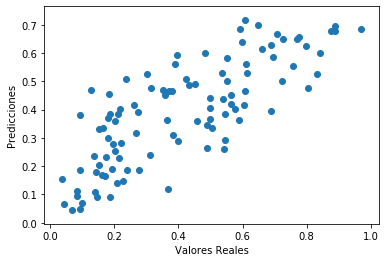

In [486]:
## The line / model
plt.scatter(y, y_hat)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')

In [487]:
#Evaluando modelo de 10 variables encontrado
regr10 = linear_model.LinearRegression()
xd = np.asanyarray(train[['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']])
yd = np.asanyarray(train[['Y']])
regr10.fit (xd, yd)
# The coefficients
print ('Coefficients: ', regr10.coef_)

Coefficients:  [[-0.02525647 -0.07240924  0.40290436  0.23257002 -0.40214433  0.27373175
  -0.07461066  0.11308098  0.53080406  0.00871746]]


In [488]:
yd_hat= regr10.predict(test[['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']])
xd = np.asanyarray(test[['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']])
yd = np.asanyarray(test[['Y']])
print("Residual sum of squares: %.2f"
      % np.mean((yd_hat - yd) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr10.score(xd, yd))

Residual sum of squares: 0.02
Variance score: 0.60


>Teniendo encuenta que:
- la RSS mide la distancia total de los datos reales y los predichos por el modelo (un residuo es la distancia entre un dato y la linea de regresión)
- Si y_hat son los datos predichos y y son los datos reales de la variable dependiente, entonces al varianza es:
$\texttt{Variance}(y, \hat{y}) = 1 - \frac{Var\{ y - \hat{y}\}}{Var\{y\}}$, 
  El mejor puntaje posible es 1.0

Efectivamente, comparando la suma de cuadrados residuales y el variance score, tenemos que el modelo de 6 variables es mejor que el modelo con 10 variables pero por muy poco. En realidad la diferencia no es muchas y en ocasiones el modelo con 10 variables obtiene un score mayor en la varianza. Pero en general las diferencias en la RSS es mínima, lo que soporta la decisión de que **`las variables eliminadas no son significativas en el modelo de regresión`**.

In [489]:
y = df_norm['Y']
model = sm.OLS(y, x6)
results = model.fit()
print(results.params)

sex   -0.068768
bmi    0.423845
bp     0.224231
s1    -0.673541
s2     0.498232
s5     0.624307
dtype: float64


# Red Neuronal

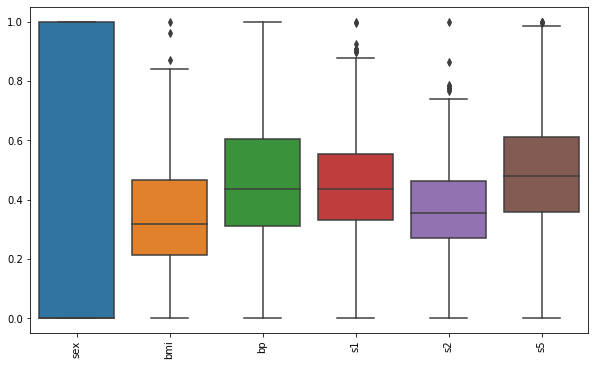

In [490]:
## Revisando las características descriptivas de las variables
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.boxplot(data=x6)
plt.xticks(rotation=90);

In [491]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x6, y, test_size=0.2)

In [492]:
# Utilización de GridSearchCV para optimizar los parámetros de la red neuronal
from sklearn.neural_network import MLPRegressor
mlp = MLPRegressor(max_iter=10000)

In [493]:
parameter_space = {
    'hidden_layer_sizes': [(50,5), (5,), (10,)], # tres configuraciones distintas de capas ocultas
    'activation': ['logistic', 'relu'], # se prueba entre las funciones de activación logística y Relu
    'solver': ['lbfgs'], # se utiliza el solver más apropiado para datos pequeños.
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant'], # se deja la tasa de aprendizaje constante ya que el solver usado no soporta otra
}

In [494]:
from sklearn.model_selection import GridSearchCV
#Se habilita la optimización de parámetros con todos los procesadores y 3 splits para la "cross-valitadion"
clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=3)
clf.fit(X_train, y_train)

C:\Users\BocanegraMartinez\Anaconda3\envs\Vision\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=MLPRegressor(activation='relu', alpha=0.0001,
                                    batch_size='auto', beta_1=0.9, beta_2=0.999,
                                    early_stopping=False, epsilon=1e-08,
                                    hidden_layer_sizes=(100,),
                                    learning_rate='constant',
                                    learning_rate_init=0.001, max_iter=10000,
                                    momentum=0.9, n_iter_no_change=10,
                                    nesterovs_momentum=True, power_t=0.5,
                                    random_st...le=True,
                                    solver='adam', tol=0.0001,
                                    validation_fraction=0.1, verbose=False,
                                    warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'activation': ['logistic', 'relu'],
                         'alp

In [495]:
# Best paramete set
print('Best parameters found:\n', clf.best_params_)

Best parameters found:
 {'activation': 'logistic', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 5), 'learning_rate': 'constant', 'solver': 'lbfgs'}


In [496]:
y_true = np.asanyarray(y_test)
y_pred =  clf.predict(X_test)

print("Residual sum of squares: %.2f"
      % np.mean((y_pred - y_true) ** 2))
print('Score: %.2f' % clf.score(X_test, y_test))


Residual sum of squares: 0.04
Score: 0.45


>Como vemos en los resultados de la red neuronal la diferencia en puntaje es similar a la del modelo de regresión lineal usado anteriormente. Pero ajustando más prámetros es seguro que se puede lograr mayor presición.